# Exploratory Data Analysis On Global Terrorism

## Author : Sahil Pawankumar Sharma         
## Sponsored by : LGM-VIP

## * Our task is to find out the hot zone of terrorism, globally.

### (1) Loading Basic Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

### (2) Loading Dataset:

In [2]:
'''import chardet   #chardet is universal character encoding detector, after using this it gives the proper encoding of our dataset.
with open('F:/C Drive/Desktop/LMGVIP/EDA-Terrorism/Global Terrorism - START data/globalterrorismdb_0718dist.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result'''

"import chardet   #chardet is universal character encoding detector, after using this it gives the proper encoding of our dataset.\nwith open('F:/C Drive/Desktop/LMGVIP/EDA-Terrorism/Global Terrorism - START data/globalterrorismdb_0718dist.csv','rb') as rawdata:\n    result = chardet.detect(rawdata.read(100000))\nresult"

In [3]:
data = pd.read_csv('F:/C Drive/Desktop/LMGVIP/EDA-Terrorism/Global Terrorism - START data/globalterrorismdb_0718dist.csv',
                   encoding='latin',low_memory=False)
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

##### Here's top 5 rows of our Dataset.

### (3) Pre-Processing of Data:

#### (1) More about Dataset:

In [4]:
data.shape

(181691, 135)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


#### (2) Descriptive Statistics:

In [6]:
data.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

##### This gives the count, mean, median, mode, minimum value, maximum value, quartiles and standard deviation of the dataset.
##### We can see that mean terror attack of country is approximately 132.

#### (3) Finding missing value in the dataset, If any: 

In [7]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

##### There are lots of coulumns with missing values, so we have to fill the neccessary attributes with sutaible numbers and unnunnecessary columns with deletion.

#### (4) Finding names of columns with null values:

In [8]:
nan_values = data.isnull()
nan_columns= nan_values.any()
columns_with_nan = data.columns[nan_columns].tolist()
columns_with_nan

['approxdate',
 'resolution',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'location',
 'summary',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'nperps',
 'nperpcap',
 'claimed',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weapsubtype1',
 'weapsubtype1_txt',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',


##### These are the columns with missing values in which some are important for Explotary Data Analysis while some are not that much important.

In [9]:
print(data['country'].value_counts())

95     24636
153    14368
4      12731
92     11960
45      8306
       ...  
422        1
532        1
149        1
66         1
226        1
Name: country, Length: 205, dtype: int64


##### There are total 205 different different countries affected by Terrorism.

#### Our dataset contain no proper naming of attributes so we rename them with meaningful name:

In [10]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'Latitude','longitude':'Longitude','summary':'Summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Target','weaptype1_txt':'Weapon','nkill':'Kill',
                     'nwound':'Wound','motive':'Motive'},inplace=True)

In [11]:
df=data[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attacktype','Target','Group',
         'Weapon','Kill','Wound','Summary','Motive']]

In [12]:
df.describe()

Year          Month            Day       Latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean     2002.638997       6.467277      15.505644      23.498343   
std        13.259430       3.388303       8.814045      18.569242   
min      1970.000000       0.000000       0.000000     -53.154613   
25%      1991.000000       4.000000       8.000000      11.510046   
50%      2009.000000       6.000000      15.000000      31.467463   
75%      2014.000000       9.000000      23.000000      34.685087   
max      2017.000000      12.000000      31.000000      74.633553   

          Longitude           Kill          Wound  
count  1.771340e+05  171378.000000  165380.000000  
mean  -4.586957e+02       2.403272       3.167668  
std    2.047790e+05      11.545741      35.949392  
min   -8.618590e+07       0.000000       0.000000  
25%    4.545640e+00       0.000000       0.000000  
50%    4.324651e+01       0.000000       0.000000  
75%    6.871033e+01       2.000000       2.000000  
max    1.793667e+02    1570.000000    8191.000000

In [13]:
df.count()

Year          181691
Month         181691
Day           181691
Country       181691
State         181270
Region        181691
City          181257
Latitude      177135
Longitude     177134
Attacktype    181691
Target        181691
Group         181691
Weapon        181691
Kill          171378
Wound         165380
Summary       115562
Motive         50561
dtype: int64

##### This shows that the count of each columns.

In [14]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
State            421
Region             0
City             434
Latitude        4556
Longitude       4557
Attacktype         0
Target             0
Group              0
Weapon             0
Kill           10313
Wound          16311
Summary        66129
Motive        131130
dtype: int64

##### We can see that there are some missing values in 'State','City','Latitude','Longitude','Kill','Wound','Motive', and 'Summary'.

## Visualization of Missing Value using Heatmap:

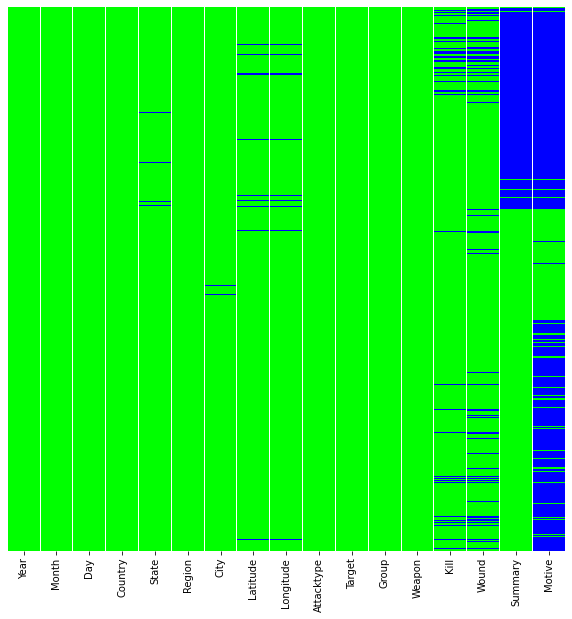

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='brg_r');

##### This blue line over green colour shows the presence of missing values in the dataset.

##### Columns with null values are:
* State
* City
* Latitude
* Longitude
* Kill
* Wound
* Summary
* Motive
* Most of the null values are present in the 'Summary' and 'Motive' which are not usefull for our analysis.
* 'Latitude' and 'Longitude' are of no use in our EDA, so we will remove them.


### Filling '0' where null values in 'Wound' and 'Kill' columns:

In [16]:
df['Wound']=df['Wound'].fillna(0)
df['Kill']=df['Kill'].fillna(0)
df['Casualities']= df['Wound'] + df['Kill']

<ipython-input-16-b33dbc2c01f0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wound']=df['Wound'].fillna(0)
<ipython-input-16-b33dbc2c01f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kill']=df['Kill'].fillna(0)
<ipython-input-16-b33dbc2c01f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [17]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
Attacktype          0
Target              0
Group               0
Weapon              0
Kill                0
Wound               0
Summary         66129
Motive         131130
Casualities         0
dtype: int64

### Filling 'unknown' Where there is null values in 'State' and 'City' columns:

In [18]:
df['State'].fillna('unknown', inplace = True)
df['City'].fillna('unknown', inplace = True)

C:\Compiler\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [19]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State               0
Region              0
City                0
Latitude         4556
Longitude        4557
Attacktype          0
Target              0
Group               0
Weapon              0
Kill                0
Wound               0
Summary         66129
Motive         131130
Casualities         0
dtype: int64

### Droping the remaining columns with null values:

In [20]:
df.dropna(axis=1,inplace=True)

<ipython-input-20-98038bff5517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=1,inplace=True)


In [21]:
df.isnull().sum()

Year           0
Month          0
Day            0
Country        0
State          0
Region         0
City           0
Attacktype     0
Target         0
Group          0
Weapon         0
Kill           0
Wound          0
Casualities    0
dtype: int64

##### Now, our dataset do not contains any missing values.

In [22]:
df.head()

Year  Month  Day             Country    State                       Region  \
0  1970      7    2  Dominican Republic  unknown  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            City                      Attacktype                       Target  \
0  Santo Domingo                   Assassination  Private Citizens & Property   
1    Mexico city     Hostage Taking (Kidnapping)      Government (Diplomatic)   
2        Unknown                   Assassination          Journalists & Media   
3         Athens               Bombing/Explosion      Government (Diplomatic)   
4        Fukouka  Facility/Infrastructure Attack      Government (Diplomatic)   

                                Group      Weapon  Kill  Wound  Casualities  
0                              MANO-D     Unknown   1.0    0.0          1.0  
1  23rd of September Communist League     Unknown   0.0    0.0          0.0  
2                             Unknown     Unknown   1.0    0.0          1.0  
3                             Unknown  Explosives   0.0    0.0          0.0  
4                             Unknown  Incendiary   0.0    0.0          0.0

In [23]:
df.describe()

Year          Month            Day           Kill  \
count  181691.000000  181691.000000  181691.000000  181691.000000   
mean     2002.638997       6.467277      15.505644       2.266860   
std        13.259430       3.388303       8.814045      11.227057   
min      1970.000000       0.000000       0.000000       0.000000   
25%      1991.000000       4.000000       8.000000       0.000000   
50%      2009.000000       6.000000      15.000000       0.000000   
75%      2014.000000       9.000000      23.000000       2.000000   
max      2017.000000      12.000000      31.000000    1570.000000   

               Wound    Casualities  
count  181691.000000  181691.000000  
mean        2.883296       5.150156  
std        34.309747      40.555416  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       1.000000  
75%         2.000000       4.000000  
max      8191.000000    9574.000000

# Data Visualization:

### Heatmap of Correlation Matrix:

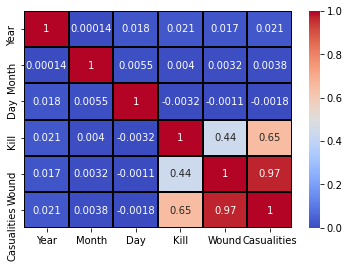

In [24]:
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, linewidths=1, linecolor='black');

##### Correlation Matrix doesn't provide any useful information for Hot-Zone of terrorism.

### No of Attack Over Different Regions:

In [25]:
pd.crosstab(df.Year,df.Region)

Region  Australasia & Oceania  Central America & Caribbean  Central Asia  \
Year                                                                       
1970                        1                            7             0   
1971                        1                            5             0   
1972                        8                            3             0   
1973                        1                            6             0   
1974                        1                           11             0   
1975                        0                            9             0   
1976                        0                           45             0   
1977                        0                           24             0   
1978                        2                          199             0   
1979                        2                          609             0   
1980                        7                         1070             0   
1981                        3                         1148             0   
1982                        2                          996             0   
1983                        0                          858             0   
1984                       11                          681             0   
1985                        7                          780             0   
1986                        4                          393             0   
1987                        3                          566             0   
1988                       12                          495             0   
1989                       29                          503             0   
1990                       18                          316             0   
1991                       10                          729             7   
1992                       17                          212            77   
1994                       14                          180            65   
1995                       18                          168            55   
1996                       19                          116            33   
1997                        7                          117            49   
1998                        6                            1            25   
1999                        4                            8            24   
2000                        6                           14            21   
2001                        4                            8            18   
2002                        2                            3             6   
2003                        4                            8             7   
2004                        0                            5             8   
2005                        0                            3            11   
2006                        2                            5             6   
2007                        1                            4             4   
2008                        8                            0            36   
2009                        1                            9            31   
2010                        1                            1             9   
2011                        0                            1             9   
2012                        0                            1            12   
2013                        1                           14             7   
2014                        9                            5             9   
2015                       14                            1            10   
2016                       10                            3            17   
2017                       12                            4             7   

Region  East Asia  Eastern Europe  Middle East & North Africa  North America  \
Year                                                                           
1970            2              12                          28            472   
1971            1               5  

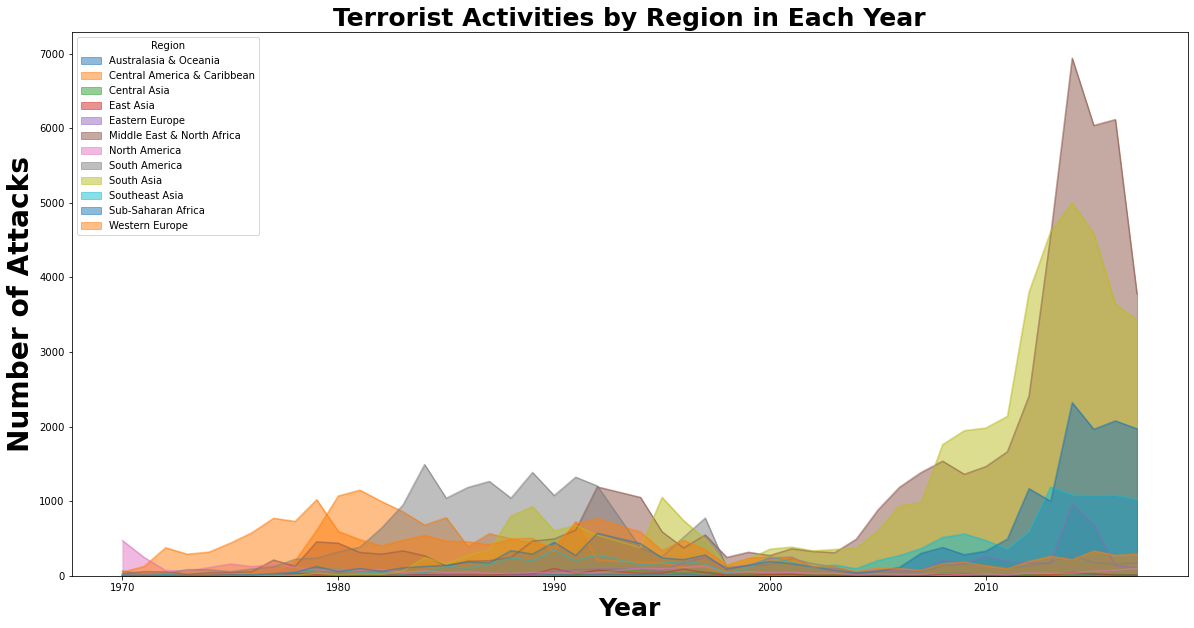

In [26]:
pd.crosstab(df.Year,df.Region).plot(kind="area",stacked=False,figsize=(20,10))
plt.title("Terrorist Activities by Region in Each Year",fontsize=25,fontweight="bold")
plt.xlabel("Year",fontsize=25,fontweight="bold")
plt.ylabel('Number of Attacks',fontsize=28,fontweight="bold");
plt.show()

##### We can see that 'Middle East & North America' had most affected Region in the world, followed by 'South Asia'.
##### Number of terror attacks increased after Year 2000 and became maximum in the Year 2014.
##### We can get more idea about the Region wise attack and Attacktype together with the help of 'sunburst plot'. 

### Number of People Killed with the Type of Attack:

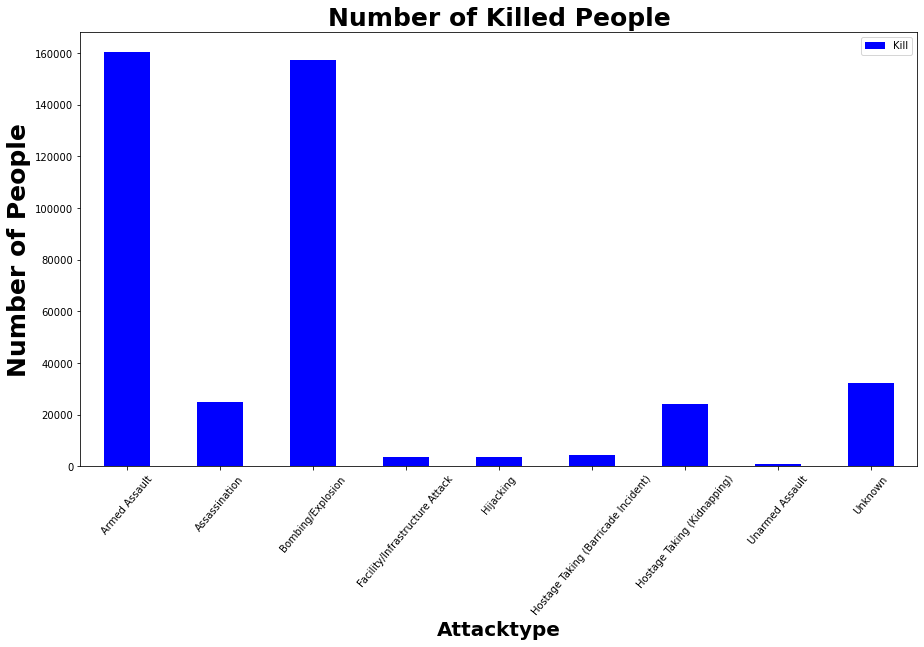

In [27]:
df[["Attacktype","Kill"]].groupby(["Attacktype"]).sum().plot(kind='bar',figsize=(15,8),color=['blue'])
plt.xticks(rotation=50)
plt.xlabel("Attacktype",fontsize=20,fontweight="bold")
plt.ylabel("Number of People",fontsize=25,fontweight="bold")
plt.title("Number of Killed People",fontsize=25,fontweight="bold");

### Region & Attacktype together using plotly:

In [28]:
fig = px.sunburst(df,values="Casualities",path=["Region","Attacktype"],color_discrete_sequence=px.colors.qualitative.Dark24,
                 title="Sunburst Chart : Grouping the Type of Attacks in Different Regions")
fig.show()

##### sunburst plot are very help-full to visualize more about dataset.
##### Here,we can easily see that 'Middle East & North Africa' region had the highest 'Casualities' followed by 'South Asia' along with 'Attacktype'.

### Country Wise Attack:

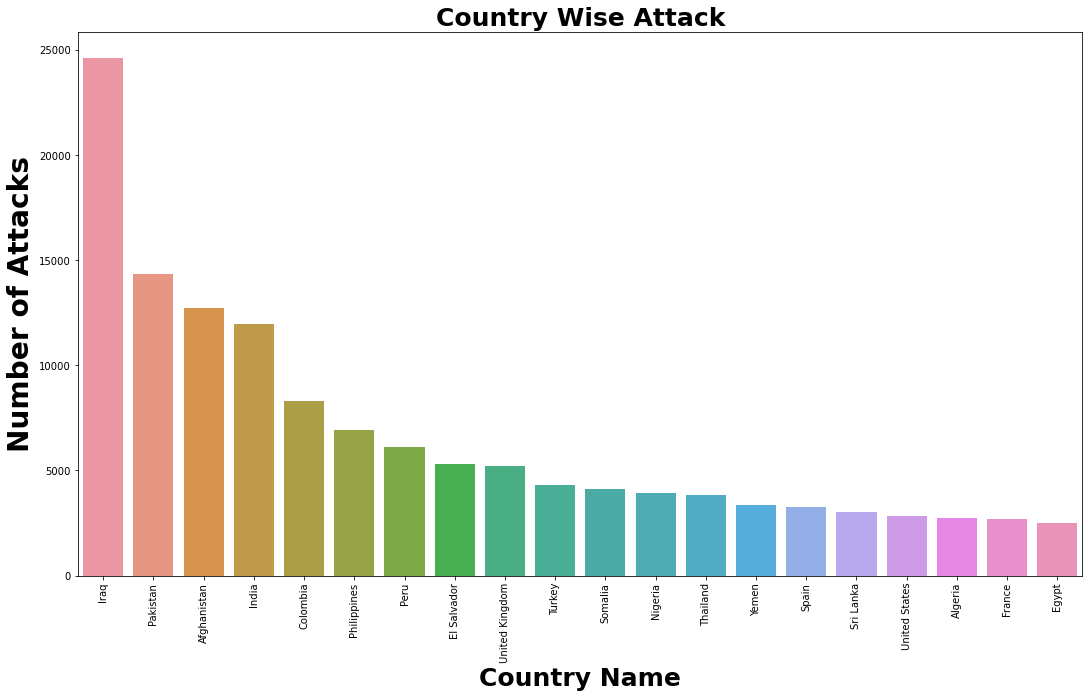

In [29]:
plt.rcParams['figure.figsize'] = 18,10
sns.barplot(x=df['Country'].value_counts()[:20].index,y=df['Country'].value_counts()[:20].values)
plt.title("Country Wise Attack",fontsize=25,fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("Country Name",fontsize=25,fontweight="bold")
plt.ylabel('Number of Attacks',fontsize=28,fontweight="bold");

##### We can conclude that Iraq had maximum number of terror attacks followed by Pakistan and Afghanistan.
##### And Egypt had lower number of attacks.

### Top 10 Cities Affected by Terrorism:

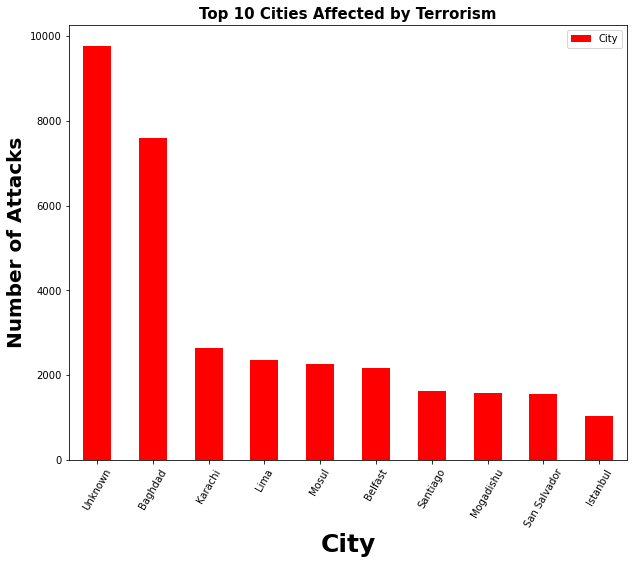

In [30]:
df["City"].value_counts().to_frame().sort_values("City",axis=0,ascending=False).head(10).plot(kind='bar',
                                                                                              figsize=(10,8),color="Red")
plt.title("Top 10 Cities Affected by Terrorism",fontsize=15,fontweight="bold")
plt.xticks(rotation=60)
plt.xlabel("City",fontsize=25,fontweight="bold")
plt.ylabel('Number of Attacks',fontsize=20,fontweight="bold");
plt.show()

##### Baghdad, Karachi, Lima, Mosul, Belfast, Santiago, Mogadishu, San Salvador and Istanbul are the most afftected cities in the world.

### Month Wise Attack:

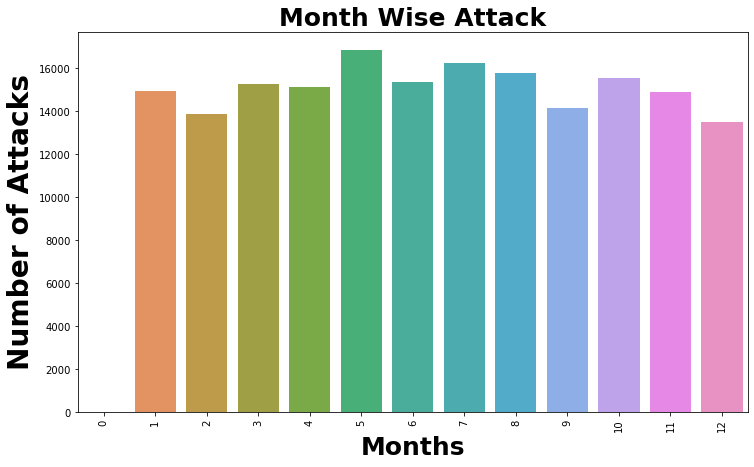

In [31]:
plt.rcParams['figure.figsize'] = 12,7
sns.barplot(x=df['Month'].value_counts()[:20].index,y=df['Month'].value_counts()[:20].values)
plt.title("Month Wise Attack",fontsize=25,fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("Months",fontsize=25,fontweight="bold")
plt.ylabel('Number of Attacks',fontsize=28,fontweight="bold");


##### In the month of May, Most of the terror attacks were happened.

### Name of Attack Groups Over Different Cities:

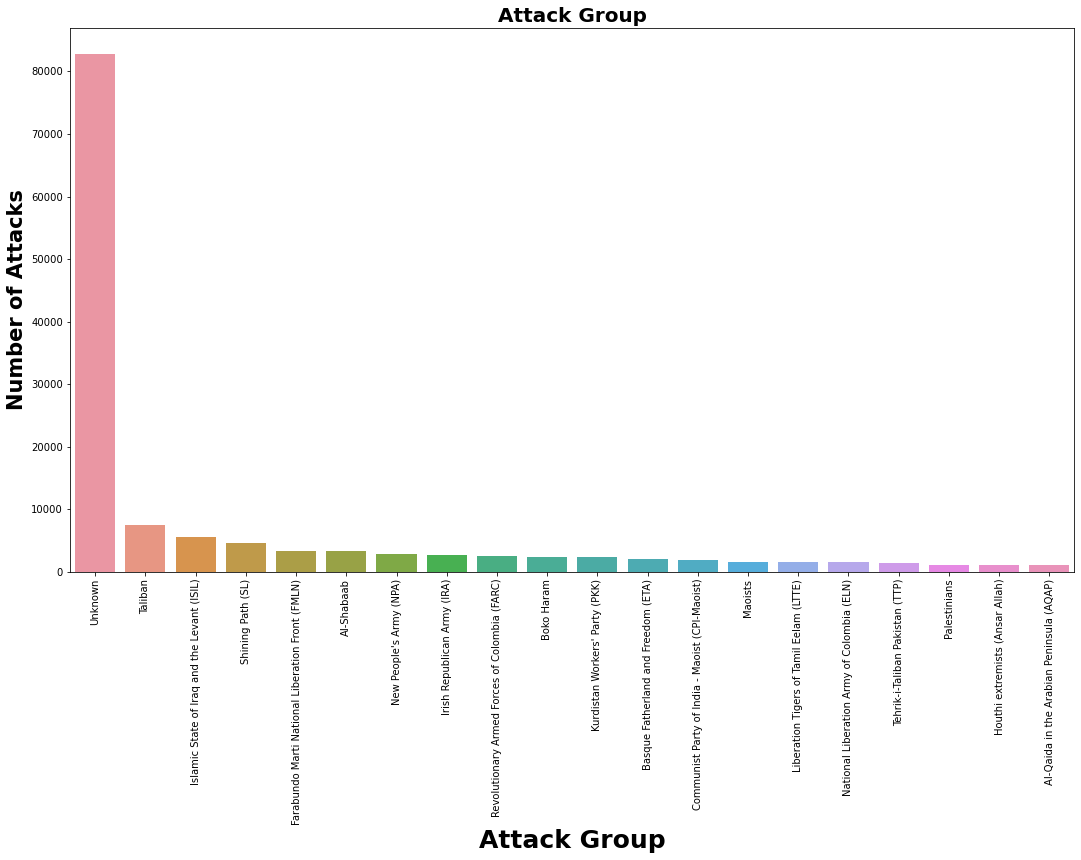

In [32]:
plt.rcParams['figure.figsize'] = 18,10
sns.barplot(x=df['Group'].value_counts()[:20].index,y=df['Group'].value_counts()[:20].values)
plt.title("Attack Group",fontsize=20,fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("Attack Group",fontsize=25,fontweight="bold")
plt.ylabel('Number of Attacks',fontsize=21,fontweight="bold");

##### Most of the Terror Organizations are unknown. 
##### Most of attacks are held by the 'Taliban' followed by 'ISIL' and 'SL'.
##### And least of attacks are held by 'AQAP'.

### Number of Kills by each Terrorist Organizations in each Country:

In [33]:
group=df[["Group","Country","Kill"]]
group = group.groupby(["Group","Country"],axis=0).sum().sort_values("Kill",
                                                                    ascending=False).drop("Unknown").reset_index().head(10)
group

C:\Compiler\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



Group      Country     Kill
0       Islamic State of Iraq and the Levant (ISIL)         Iraq  31058.0
1                                           Taliban  Afghanistan  29269.0
2                                        Boko Haram      Nigeria  16917.0
3                                 Shining Path (SL)         Peru  11595.0
4           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka  10928.0
5                                        Al-Shabaab      Somalia   8176.0
6  Farabundo Marti National Liberation Front (FMLN)  El Salvador   8019.0
7       Islamic State of Iraq and the Levant (ISIL)        Syria   6883.0
8                 Nicaraguan Democratic Force (FDN)    Nicaragua   6630.0
9                   Tehrik-i-Taliban Pakistan (TTP)     Pakistan   6014.0

##### Islamic State of Iraq and the Levant (ISIL) is responsible for most of the Kills in the world (Number of Killed People = 31058).

### Motives of Attacks in Different Cities:

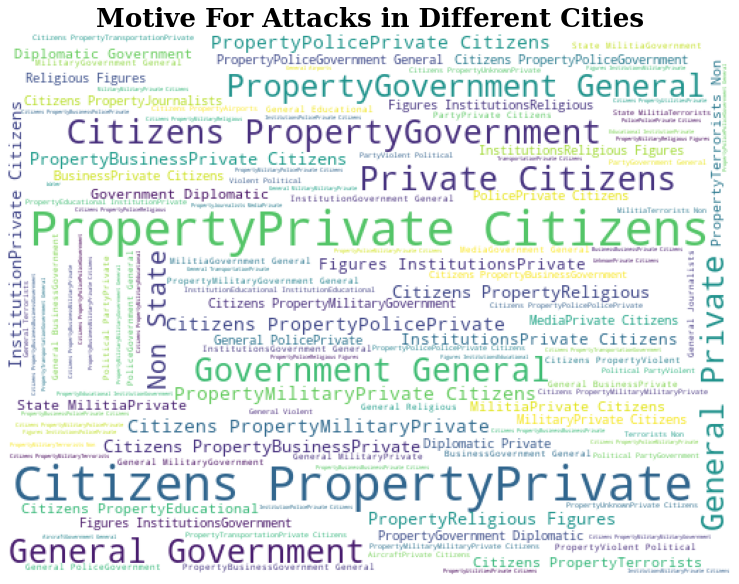

In [34]:
cities = df.Target.dropna(False)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color="white",width=512,height=384,).generate(''.join(cities))
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Motive For Attacks in Different Cities",fontdict={"family":"serif","color":"black","weight":"bold","size":26,})
plt.show()

# Conclussion:

* Region with the most attacks : Middle East & North Africa
* Most attack types : Bombing / Explossion & Armed Assault
* Terror type which killed the most : Armed Assault
* Country with the most attacks : Iraq
* City with most attacks : Baghdad
* Month with the most attacks : May
* Year with the most attack and most people : 2014
* Group with the most attacks : Taliban
* Most of the attacks were not recognized by any group
* Mostly, The Targets of terrorists are Citizens, Private Property.

## HOT-ZONE OF TERRORISM : IRAQ